In [1]:
# importing necessary liberaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import GridSearchCV



In [2]:
# loading data
df=pd.read_csv('placedata v2.0 synthetic.csv')

In [3]:
nrows,ncols=df.shape
print(f"Number of rows {nrows} \nNumber of columns {ncols}")

Number of rows 10000 
Number of columns 12


In [4]:
# checking for random samples from the data

df.sample(4)

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
9504       9505   7.4            1         2                         1   
2152       2153   6.5            1         1                         1   
3896       3897   8.4            2         3                         2   
8974       8975   8.3            1         3                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
9504                 69               3.4                        No   
2152                 60               4.0                        No   
3896                 89               4.8                       Yes   
8974                 79               4.3                       Yes   

     PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
9504               Yes         57         66       NotPlaced  
2152                No         70         71       NotPlaced  
3896               Yes         74         82          Placed  
8974               Yes         55         84       NotPlaced

In [5]:
# renameing and removing unnecessary columns
df.rename(columns={'Communication Skill Rating':'communi_rating','Workshops/Certificatios':'workshops'},inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
# checking for data type of columns that are in the dataset
df.dtypes

StudentID                      int64
CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities     object
PlacementTraining             object
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus               object
dtype: object

In [7]:
# checking statical summery
df.describe()

StudentID          CGPA   Internships      Projects  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      7.698010      1.049200      2.026600   
std     2886.89568      0.640131      0.665901      0.867968   
min        1.00000      6.500000      0.000000      0.000000   
25%     2500.75000      7.400000      1.000000      1.000000   
50%     5000.50000      7.700000      1.000000      2.000000   
75%     7500.25000      8.200000      1.000000      3.000000   
max    10000.00000      9.100000      2.000000      3.000000   

       Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count              10000.000000       10000.000000      10000.000000   
mean                   1.013200          79.449900          4.323960   
std                    0.904272           8.159997          0.411622   
min                    0.000000          60.000000          3.000000   
25%                    0.000000          73.000000          4.000000   
50%                    1.000000          80.000000          4.400000   
75%                    2.000000          87.000000          4.700000   
max                    3.000000          90.000000          4.800000   

          SSC_Marks     HSC_Marks  
count  10000.000000  10000.000000  
mean      69.159400     74.501500  
std       10.430459      8.919527  
min       55.000000     57.000000  
25%       59.000000     67.000000  
50%       70.000000     73.000000  
75%       78.000000     83.000000  
max       90.000000     88.000000

In [8]:
# checking for the missing values in the data set
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


In [12]:
# Encode categorical variables using the label encoder
le = preprocessing.LabelEncoder()
df['PlacementTraining'] = le.fit_transform(df['PlacementTraining'])
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed=1, NotPlaced=0

In [13]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78         82                1  
2                  0         79         80                0  
3                  1         81         80                1  
4                  1         74         88                1

In [14]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78         82                1  
2                  0         79         80                0  
3                  1         81         80                1  
4                  1         74         88                1

In [15]:
# duplicate rows
nduplicates=df.duplicated().sum()

if nduplicates>0:
  print("There are nduplicates rows in the dataset")
else:
  print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


In [16]:
# checking uniques value for each of the columns
for i in df.columns:
    print(f"{i} : {df[i].unique()}")

StudentID : [    1     2     3 ...  9998  9999 10000]
CGPA : [7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4 8.6 8.2 6.8 7.6 6.7 8.4 8.5 6.9
 8.1 8.8 8.  6.6 7.2 7.1 8.7 9.  9.1]
Internships : [1 0 2]
Projects : [1 3 2 0]
Workshops/Certifications : [1 2 0 3]
AptitudeTestScore : [65 90 82 85 86 71 76 84 79 74 66 78 73 70 72 77 60 81 63 75 67 89 88 62
 80 68 87 69 83 64 61]
SoftSkillsRating : [4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3.
 3.1]
ExtracurricularActivities : [0 1]
PlacementTraining : [0 1]
SSC_Marks : [61 78 79 81 74 55 62 59 75 85 82 71 84 63 72 58 77 56 68 76 64 66 60 65
 80 70 57 86 90 73 69 83 87 67 88 89]
HSC_Marks : [79 82 80 88 66 65 72 71 86 87 83 73 78 63 75 69 57 61 85 68 81 84 60 67
 64 76 70 62 74 59 58 77]
PlacementStatus : [0 1]


In [17]:
df.fillna(0,inplace=True)

<Axes: ylabel='Frequency'>

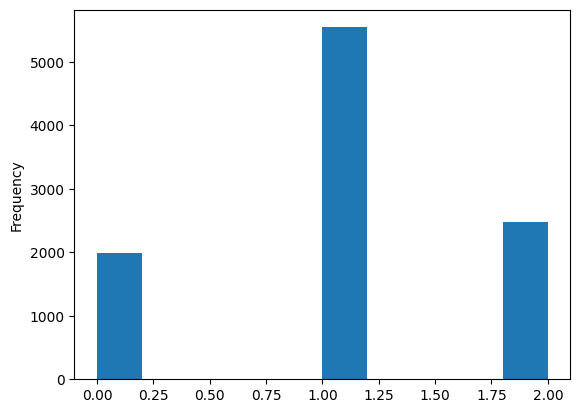

In [19]:
df["Internships"].plot(kind='hist')

<Axes: ylabel='Frequency'>

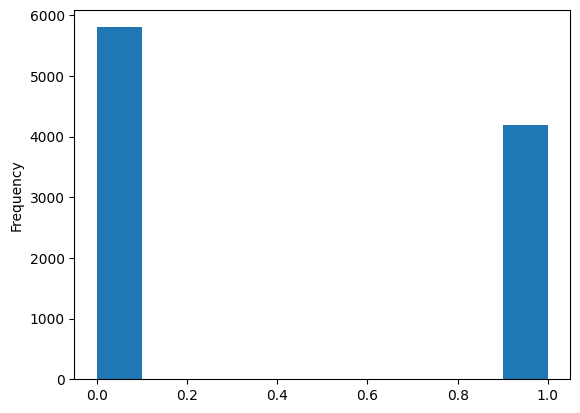

In [20]:
df["PlacementStatus"].plot(kind='hist')
# ALmost all half people are not placed

In [21]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78         82                1  
2                  0         79         80                0  
3                  1         81         80                1  
4                  1         74         88                1

In [22]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78         82                1  
2                  0         79         80                0  
3                  1         81         80                1  
4                  1         74         88                1

In [23]:
# checking for correlation between the columns
df.corr()['PlacementStatus']

StudentID                    0.004294
CGPA                         0.423131
Internships                  0.260340
Projects                     0.475186
Workshops/Certifications     0.362268
AptitudeTestScore            0.521744
SoftSkillsRating             0.427284
ExtracurricularActivities    0.482491
PlacementTraining            0.323659
SSC_Marks                    0.469763
HSC_Marks                    0.505746
PlacementStatus              1.000000
Name: PlacementStatus, dtype: float64

Skills, Internship, 10th Percentage, and Workshops show moderate positive correlations with placement status, meaning these factors positively influence placement chances.
Backlogs has a strong negative correlation, indicating that more backlogs significantly reduce the likelihood of placement.
Salary is highly correlated with placement status, showing a strong relationship between getting placed and a higher salary.
Other factors such as CGPA and Communication Rating also moderately impact placement, but not as strongly as Skills or Workshops.

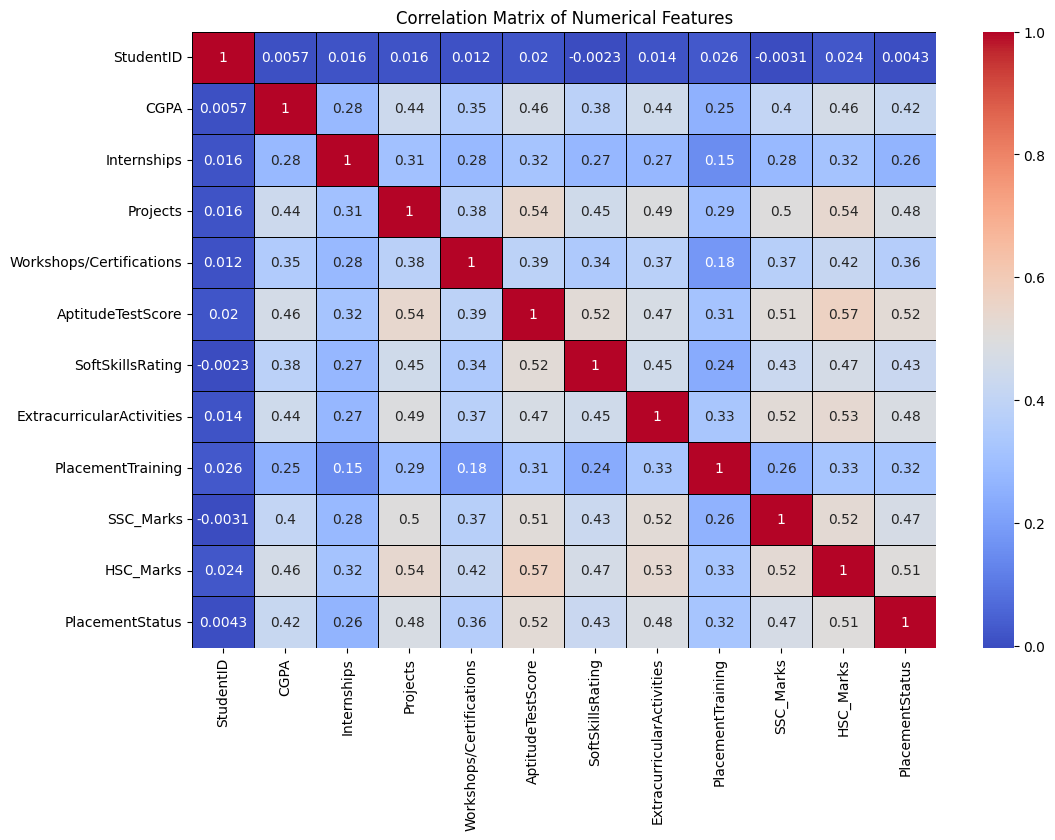

In [24]:
corr_matrix = df.corr()

# 2. Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

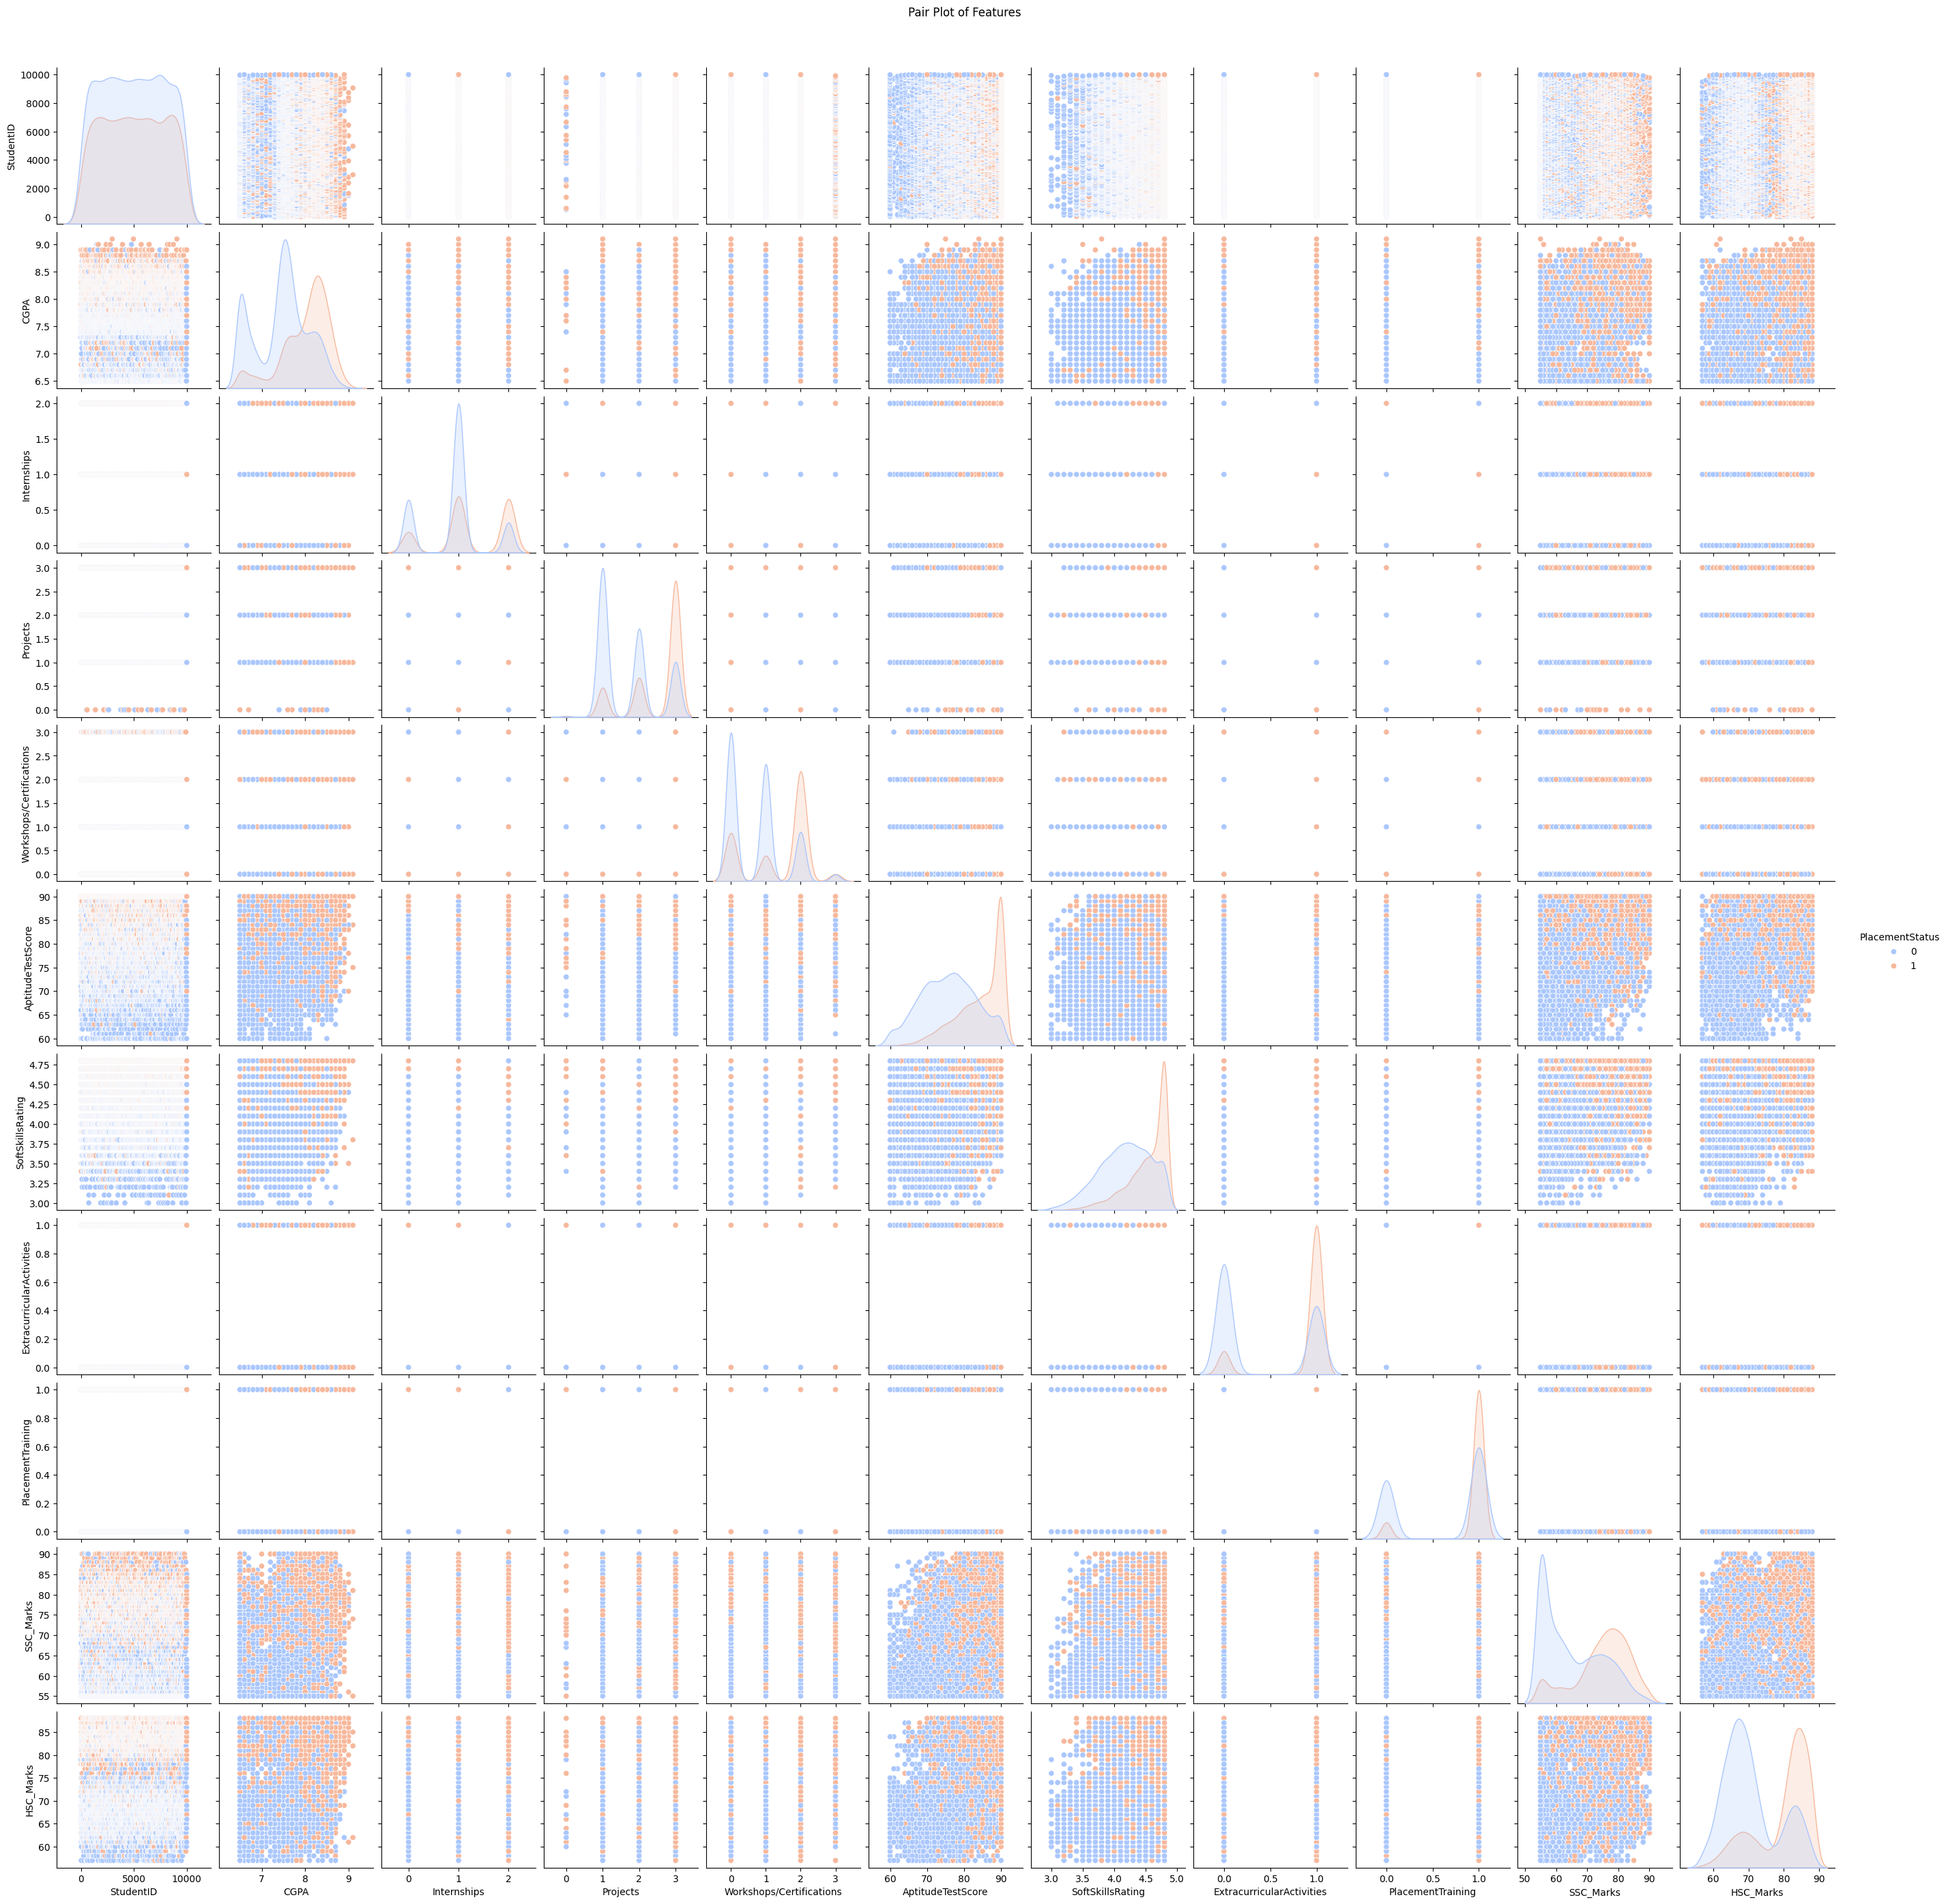

In [25]:
# pair plot to obserb the relationship between each individual vaiables with the target variables
sns.pairplot(df, diag_kind='kde', hue='PlacementStatus', palette='coolwarm')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

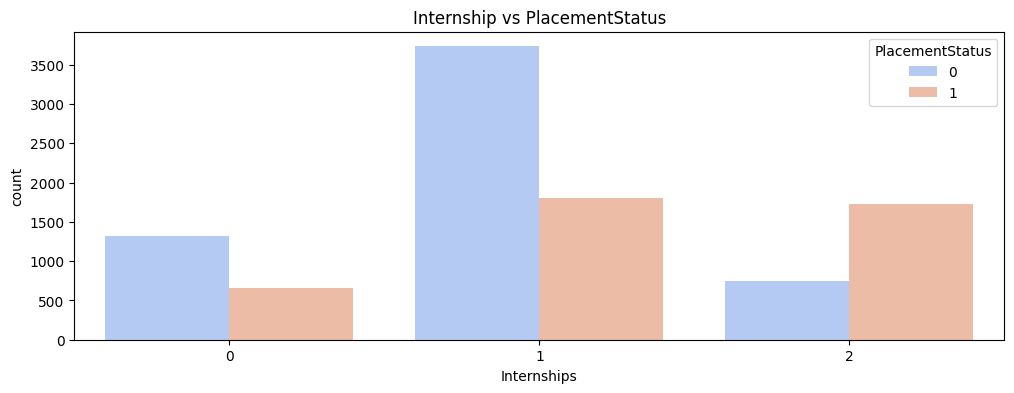

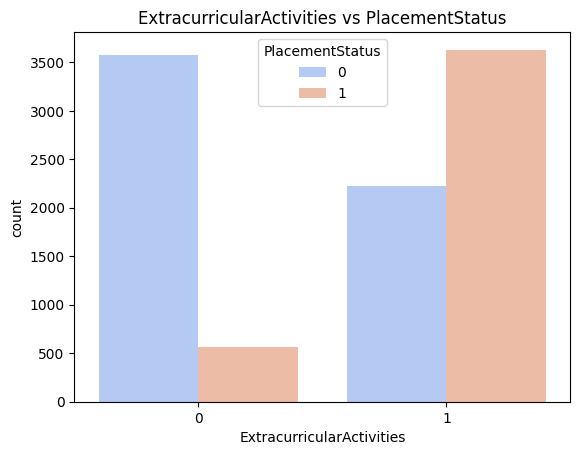

In [26]:
# Count plot for Internship vs PlacementStatus
plt.figure(figsize=(12, 4))
sns.countplot(x='Internships', hue='PlacementStatus', data=df, palette='coolwarm')
plt.title('Internship vs PlacementStatus')
plt.show()

# Count plot for ExtracurricularActivities vs PlacementStatus
sns.countplot(x='ExtracurricularActivities', hue='PlacementStatus', data=df, palette='coolwarm')
plt.title('ExtracurricularActivities vs PlacementStatus')
plt.show()


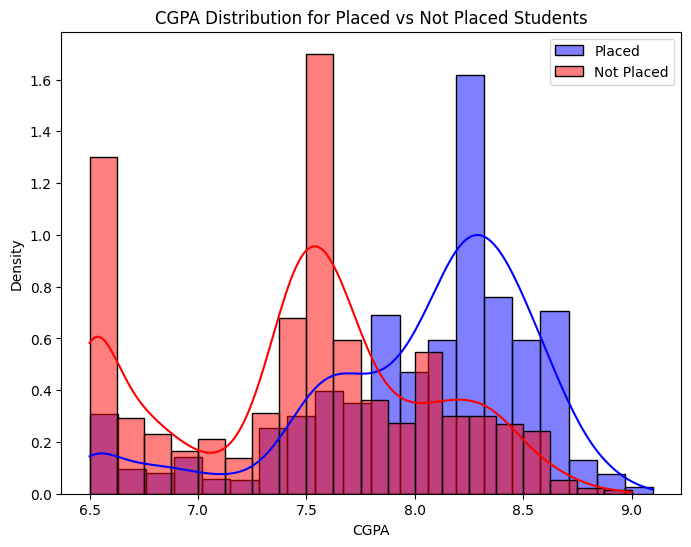

In [27]:
# Distribution of CGPA for Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['CGPA'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['CGPA'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('CGPA Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()


In [28]:
# Distribution of CGPA for Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['backlogs'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['backlogs'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('backlogs Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()


KeyError: 'backlogs'

<Figure size 800x600 with 0 Axes>

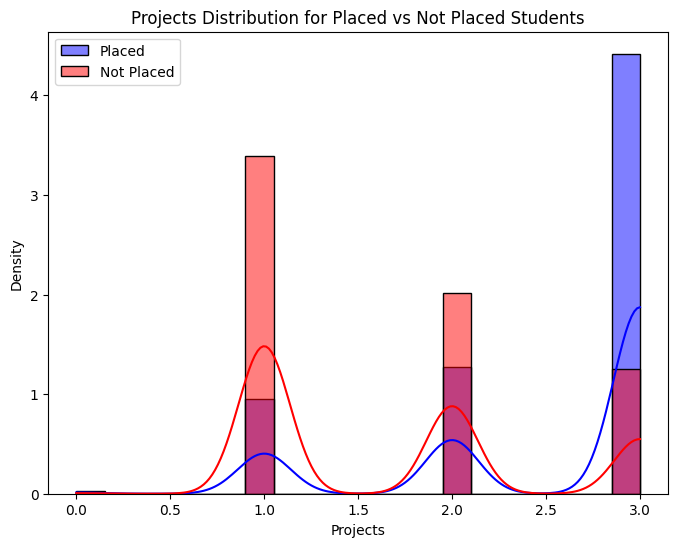

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['Projects'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['Projects'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('Projects Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()

C:\Users\Sijal\AppData\Local\Temp\ipykernel_21532\4290577724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='CGPA', data=df, palette='coolwarm')


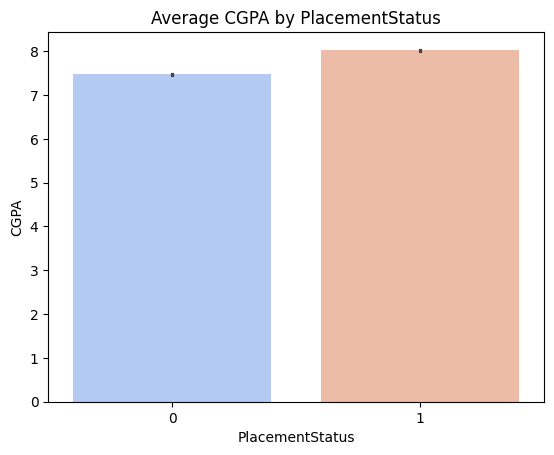

In [32]:
# Bar plot showing average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='CGPA', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

C:\Users\Sijal\AppData\Local\Temp\ipykernel_21532\899476477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Projects', data=df, palette='coolwarm')


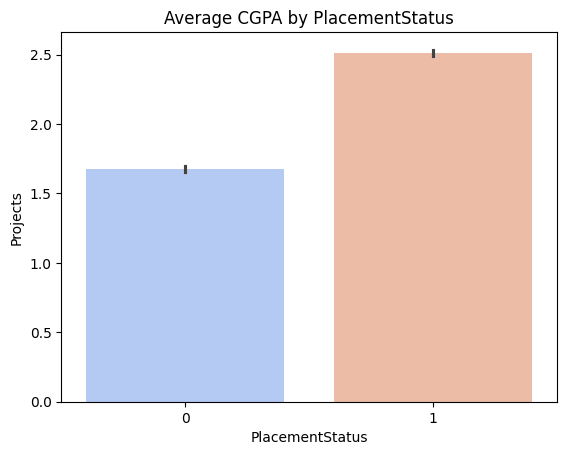

In [33]:
# Bar plot showing average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='Projects', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

C:\Users\Sijal\AppData\Local\Temp\ipykernel_21532\828139279.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='ExtracurricularActivities', data=df, palette='coolwarm')


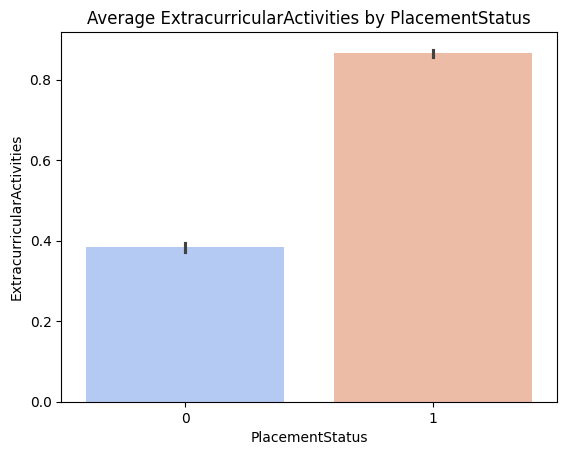

In [34]:
sns.barplot(x='PlacementStatus', y='ExtracurricularActivities', data=df, palette='coolwarm')
plt.title('Average ExtracurricularActivities by PlacementStatus')
plt.show()

C:\Users\Sijal\AppData\Local\Temp\ipykernel_21532\3313197011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Internships', data=df, palette='coolwarm')


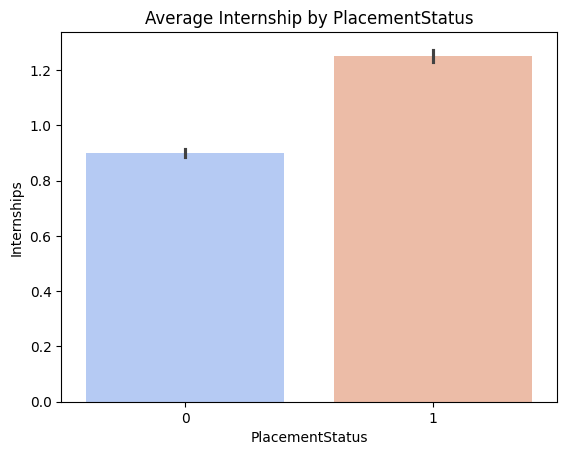

In [36]:
sns.barplot(x='PlacementStatus', y='Internships', data=df, palette='coolwarm')
plt.title('Average Internship by PlacementStatus')
plt.show()

In [39]:
'''
in this step we will be removing the following columns
1. StudentId, as heat map shows no correlation with PlacementStatus
2. PlacementStatus, it is the target variable

'''
x=df.drop(['StudentID','PlacementStatus'],axis=1)

In [40]:
x

CGPA  Internships  Projects  Workshops/Certifications  \
0      7.5            1         1                         1   
1      8.9            0         3                         2   
2      7.3            1         2                         2   
3      7.5            1         1                         2   
4      8.3            1         2                         2   
...    ...          ...       ...                       ...   
9995   7.5            1         1                         2   
9996   7.4            0         1                         0   
9997   8.4            1         3                         0   
9998   8.9            0         3                         2   
9999   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                    65               4.4                          0   
1                    90               4.0                          1   
2                    82               4.8                          1   
3                    85               4.4                          1   
4                    86               4.5                          1   
...                 ...               ...                        ...   
9995                 72               3.9                          1   
9996                 90               4.8                          0   
9997                 70               4.8                          1   
9998                 87               4.8                          1   
9999                 66               3.8                          0   

      PlacementTraining  SSC_Marks  HSC_Marks  
0                     0         61         79  
1                     1         78         82  
2                     0         79         80  
3                     1         81         80  
4                     1         74         88  
...                 ...        ...        ...  
9995                  0         85         66  
9996                  0         84         67  
9997                  1         79         81  
9998                  1         71         85  
9999                  0         62         66  

[10000 rows x 10 columns]

In [41]:
y = df['PlacementStatus']

In [42]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int32

In [43]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int32

In [44]:
x.head()

CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   7.5            1         1                         1                 65   
1   8.9            0         3                         2                 90   
2   7.3            1         2                         2                 82   
3   7.5            1         1                         2                 85   
4   8.3            1         2                         2                 86   

   SoftSkillsRating  ExtracurricularActivities  PlacementTraining  SSC_Marks  \
0               4.4                          0                  0         61   
1               4.0                          1                  1         78   
2               4.8                          1                  0         79   
3               4.4                          1                  1         81   
4               4.5                          1                  1         74   

   HSC_Marks  
0         79  
1         82  
2         80  
3         80  
4         88

In [45]:
# spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Hyperparameter tuning, cross validation and model evaluation

In [46]:
# parameters from random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters Decision
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters for KNeighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [47]:
# Initializing the models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [48]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1)

In [49]:
grid_rf.fit(x_train, y_train)
ypred=grid_rf.predict(x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [50]:
grid_dt.fit(x_train, y_train)
ypred=grid_dt.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [51]:
grid_knn.fit(x_train, y_train)
ypred=grid_knn.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [52]:
print("Best parameters for Random Forest: ", grid_rf.best_params_)
print("Best parameters for DecisionTreeClassifiert: ", grid_dt.best_params_)
print("Best parameters for KNeighborsClassifier: ", grid_knn.best_params_)

Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [53]:
# Use best estimators
rf_best = grid_rf.best_estimator_
dt_best = grid_dt.best_estimator_
knn_best = grid_knn.best_estimator_


Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}




In [54]:
classify = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
classify.fit(x_train, y_train)
ypred=classify.predict(x_test)

In [55]:
ypred

array([0, 0, 1, ..., 1, 0, 1])

In [56]:
ypred

array([0, 0, 1, ..., 1, 0, 1])

In [57]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [58]:
accuracy_score

0.7886666666666666

In [59]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [60]:
confusion_metrix

array([[1492,  282],
       [ 352,  874]], dtype=int64)

**True Negatives (TN)** = 1492
The model correctly predicted 1492 instances as Negative (when they were actually Negative).

**False Positives (FP)** = 282
The model incorrectly predicted 282 instances as Positive (when they were actually Negative). This is also known as a Type I error.

**False Negatives (FN)** = 352
The model incorrectly predicted 352 instances as Negative (when they were actually Positive). This is also known as a Type II error.

**True Positives (TP)** = 874
The model correctly predicted 1130 instances as Positive (when they were actually Positive).

In [61]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

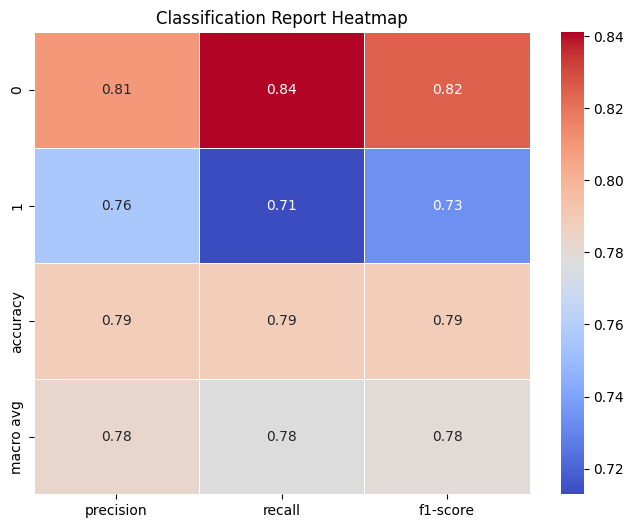

In [62]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [63]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.7886666666666666
Precision: 0.7874287104659395
Recall: 0.7886666666666666
F1-Score: 0.7876058405611648


In [64]:
importances = RandomForestClassifier.feature_importances_

In [65]:
importances = classify.feature_importances_

In [66]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

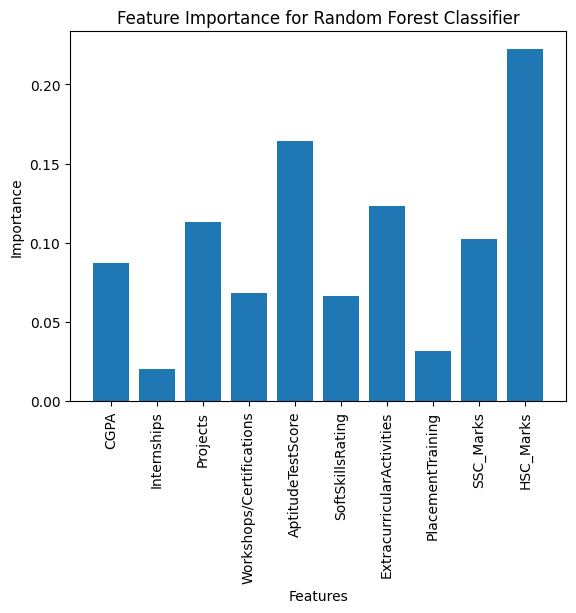

In [67]:
plt.bar(x.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.xticks(rotation=90)
plt.show()

In [68]:
ypred_pob=classify.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, ypred_pob)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8730185514528324

In [69]:
ypred_pob

array([0.01616351, 0.43899283, 0.51817007, ..., 0.73123677, 0.1393455 ,
       0.94620548])

In [70]:
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.8730185514528324

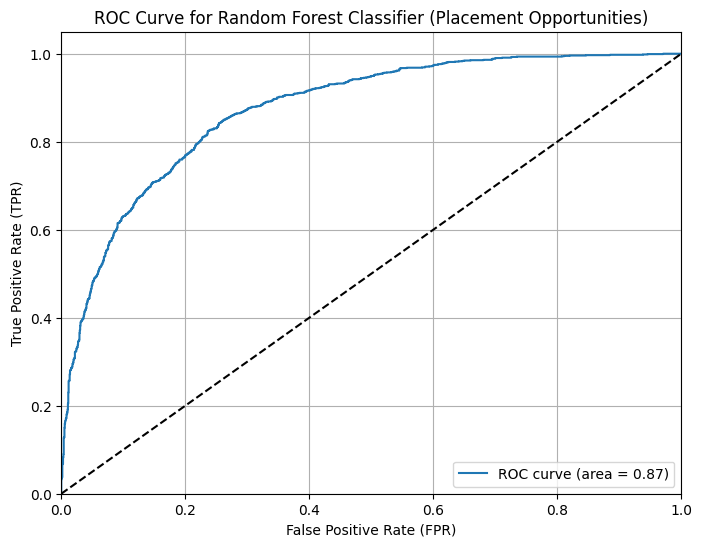

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier (Placement Opportunities)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [72]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights='distance')

In [73]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [74]:
ypred=knn.predict(x_test)

In [75]:
ypred

array([0, 1, 0, ..., 1, 0, 1])

In [76]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [77]:
accuracy_score

0.7706666666666667

In [78]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [79]:
confusion_metrix

array([[1449,  325],
       [ 363,  863]], dtype=int64)

In [80]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

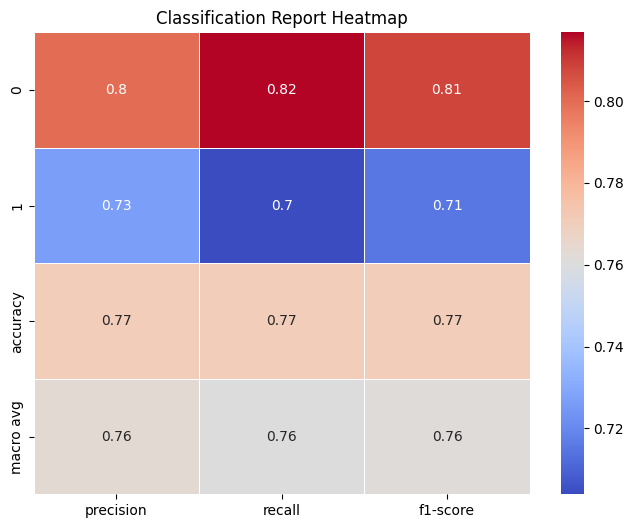

In [81]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [82]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.7706666666666667
Precision: 0.7697389866286114
Recall: 0.7706666666666667
F1-Score: 0.7700767361735233


In [83]:
clf=DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)

In [84]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [85]:
ypred=clf.predict(x_test)

In [86]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [87]:
accuracy_score

0.7566666666666667

In [88]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [89]:
confusion_metrix

array([[1459,  315],
       [ 415,  811]], dtype=int64)

In [90]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

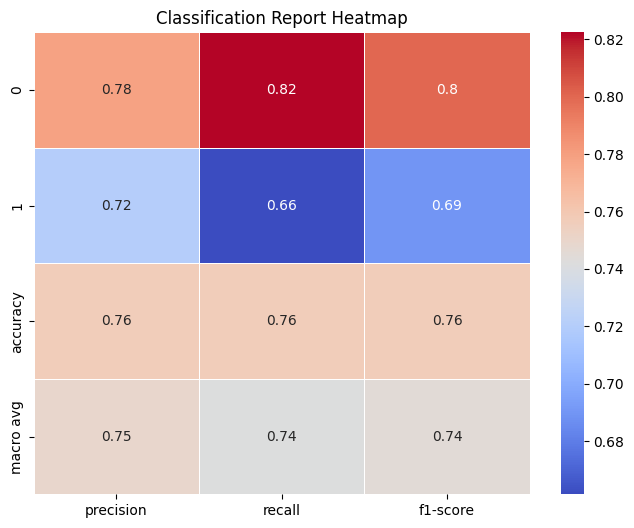

In [91]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [92]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.7566666666666667
Precision: 0.7547233369539738
Recall: 0.7566666666666667
F1-Score: 0.754828924991049



 # Voting Classifier

In [93]:
# hard voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('dt', dt_best),
    ('knn', knn_best)], voting='hard')

In [94]:
# train the Voting Classifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=9))])

In [95]:
# predict using Voting Classifier
ypred_voting = voting_clf.predict(x_test)

In [96]:
ypred_voting

array([0, 1, 1, ..., 1, 0, 1])

In [97]:
y_test

8018    0
9225    0
3854    0
2029    0
3539    1
       ..
4208    1
5335    0
2554    1
13      0
4468    1
Name: PlacementStatus, Length: 3000, dtype: int32

In [98]:
# Calculate accuracy of the Voting Classifier
voting_accuracy = metrics.accuracy_score(y_test, ypred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

Voting Classifier Accuracy: 0.7893333333333333


In [99]:
classification_report_voting = metrics.classification_report(y_test, ypred_voting)
print("Classification Report for Voting Classifier:\n", metrics.classification_report(y_test, ypred_voting))

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1774
           1       0.75      0.72      0.74      1226

    accuracy                           0.79      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.79      0.79      0.79      3000



In [100]:
# confusion matrix for Voting Classifier
confusion_voting = metrics.confusion_matrix(y_test, ypred_voting)
print(f"Confusion Matrix for Voting Classifier:\n {confusion_voting}")

Confusion Matrix for Voting Classifier:
 [[1488  286]
 [ 346  880]]


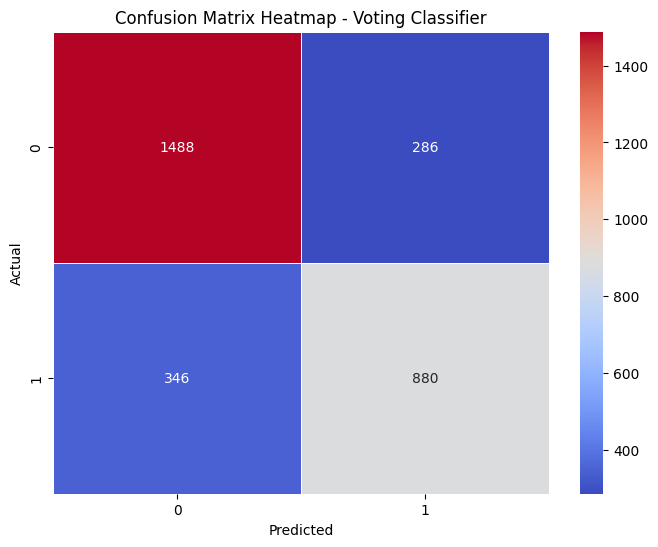

In [101]:
# plotting Confusion Matrix heatmap for Voting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_voting, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.title('Confusion Matrix Heatmap - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [102]:
# compare performance with individual models
print(f"Random Forest Accuracy: {metrics.accuracy_score(y_test, rf_best.predict(x_test))}")
print(f"Decision Tree Accuracy: {metrics.accuracy_score(y_test, dt_best.predict(x_test))}")
print(f"KNN Accuracy: {metrics.accuracy_score(y_test, knn_best.predict(x_test))}")
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# classification reports for individual models
print("Random Forest Classification Report:\n", metrics.classification_report(y_test, rf_best.predict(x_test)))
print("Decision Tree Classification Report:\n", metrics.classification_report(y_test, dt_best.predict(x_test)))
print("KNN Classification Report:\n", metrics.classification_report(y_test, knn_best.predict(x_test)))

Random Forest Accuracy: 0.7933333333333333
Decision Tree Accuracy: 0.761
KNN Accuracy: 0.783
Voting Classifier Accuracy: 0.7893333333333333
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1774
           1       0.76      0.72      0.74      1226

    accuracy                           0.79      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.79      0.79      0.79      3000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1774
           1       0.72      0.69      0.70      1226

    accuracy                           0.76      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.76      0.76      0.76      3000

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82    